In [65]:
# Student ID: 1009645706
# Student name: Devin de Silva
# Instructor: Dr. Shion Guha
# Course code: INF2178
# Program: MI
# Faculty of Information
# University of Toronto
# Assignment 2
# Data Created: March 1, 2023

In [66]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [67]:
# Read the data
df = pd.read_excel('INF2178_A2_data.xlsx')
df.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [68]:
# Dropping unnecessary columns for this data analysis
df = df.drop(columns=['_id', 'LOC_ID', 'BLDGNAME', 'ADDRESS', 'PCODE'], errors='ignore')
df.head()


,LOC_NAME,AUSPICE,ward,bldg_type,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,Lakeshore Community Child Care Centre,Non Profit Agency,3,Public Elementary School,0,20,32,52,60,164,Y,Y
1,Alternative Primary School Parent Group,Non Profit Agency,8,Public Elementary School,0,0,12,26,45,83,Y,Y
2,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,25,Catholic Elementary School,0,10,16,26,50,102,Y,Y
3,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,10,Other,10,15,40,0,0,65,Y,Y
4,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,20,High Rise Apartment,0,10,16,0,0,26,Y,Y


In [69]:
# General information about the data
df.info()

# Confirming that there's no more null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LOC_NAME     1063 non-null   object
 1   AUSPICE      1063 non-null   object
 2   ward         1063 non-null   int64 
 3   bldg_type    1063 non-null   object
 4   IGSPACE      1063 non-null   int64 
 5   TGSPACE      1063 non-null   int64 
 6   PGSPACE      1063 non-null   int64 
 7   KGSPACE      1063 non-null   int64 
 8   SGSPACE      1063 non-null   int64 
 9   TOTSPACE     1063 non-null   int64 
 10  subsidy      1063 non-null   object
 11  cwelcc_flag  1063 non-null   object
dtypes: int64(7), object(5)
memory usage: 99.8+ KB


LOC_NAME       0
AUSPICE        0
ward           0
bldg_type      0
IGSPACE        0
TGSPACE        0
PGSPACE        0
KGSPACE        0
SGSPACE        0
TOTSPACE       0
subsidy        0
cwelcc_flag    0
dtype: int64

In [70]:
# Statistical information about the dataset
df1 = df.describe()
df1

,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,12.511759,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,7.032050,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,6.000000,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,12.000000,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,19.000000,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,25.000000,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


In [71]:
# Overall capacity numbers is already given in TOTSPACE, so no need to calculate again
# However, we can create new columns for the proportion of each group space to the total spaces

df['p_IG'] = df['IGSPACE'] / df['TOTSPACE'].round(2)
df['p_TG'] = df['TGSPACE'] / df['TOTSPACE'].round(2)
df['p_PG'] = df['PGSPACE'] / df['TOTSPACE'].round(2)
df['p_KG'] = df['KGSPACE'] / df['TOTSPACE'].round(2)
df['p_SG'] = df['SGSPACE'] / df['TOTSPACE'].round(2)

df.head()

,LOC_NAME,AUSPICE,ward,bldg_type,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag,p_IG,p_TG,p_PG,p_KG,p_SG
0,Lakeshore Community Child Care Centre,Non Profit Agency,3,Public Elementary School,0,20,32,52,60,164,Y,Y,0.000000,0.121951,0.195122,0.317073,0.365854
1,Alternative Primary School Parent Group,Non Profit Agency,8,Public Elementary School,0,0,12,26,45,83,Y,Y,0.000000,0.000000,0.144578,0.313253,0.542169
2,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,25,Catholic Elementary School,0,10,16,26,50,102,Y,Y,0.000000,0.098039,0.156863,0.254902,0.490196
3,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,10,Other,10,15,40,0,0,65,Y,Y,0.153846,0.230769,0.615385,0.000000,0.000000
4,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,20,High Rise Apartment,0,10,16,0,0,26,Y,Y,0.000000,0.384615,0.615385,0.000000,0.000000


**One Way ANOVAs**

<Axes: title={'center': 'Infant Spaces by Ward'}, xlabel='ward'>

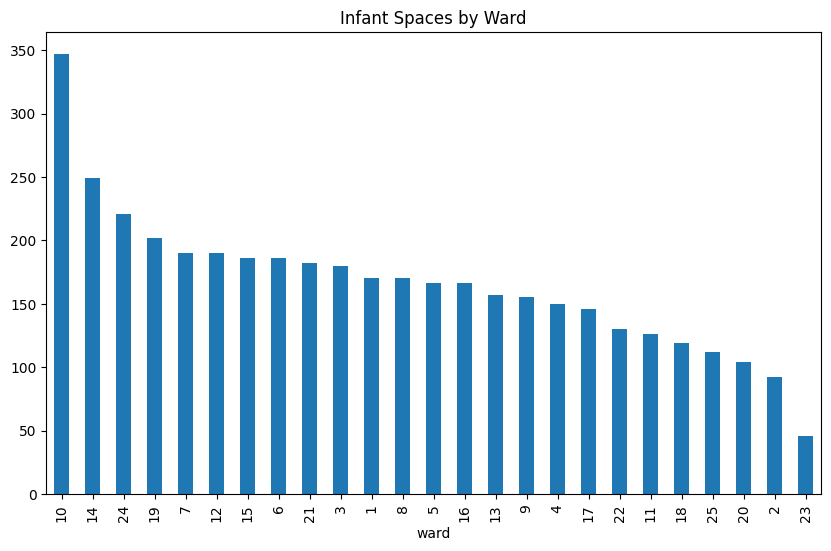

In [72]:
# One Way ANOVA Research Question 1:  Is there a significant difference in the
# number of infant spaces between different wards?
ward_total = df.groupby('ward')['IGSPACE'].sum().sort_values(ascending=False)
ward_total.plot(kind='bar', figsize=(10, 6), title='Infant Spaces by Ward')

# Ward 14 has the most infant spaces, ward 25 has the least.

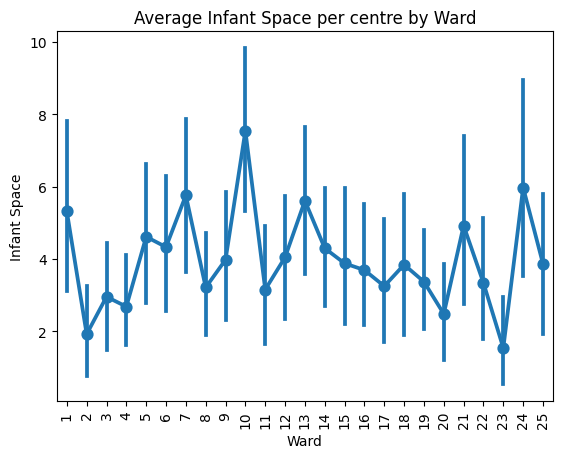

In [73]:
# Plotting the results
# Not an interaction plot. Since there is only one independent variable, there is no interaction between variables
sns.pointplot(data=df, x='ward', y='IGSPACE')
plt.title('Average Infant Space per centre by Ward')
plt.ylabel('Infant Space')
plt.xlabel('Ward')
plt.xticks(rotation=90)
plt.show()

In [74]:
model = ols('IGSPACE ~ C(ward)', data=df).fit()
anova = sm.stats.anova_lm(model, typ=2)

anova.round(2)

,sum_sq,df,F,PR(>F)
C(ward),1783.02,24.0,2.05,0.0
Residual,37627.60,1038.0,NaN,NaN


The p value is <0.001 which is much smaller than the alpha value of 0.05, hence the ward has a significant effect on infant space

In [75]:
# Check for normality of residuals by Shapiro's test
residuals = model.resid
normality = stats.shapiro(residuals)
normality

ShapiroResult(statistic=0.8057929277420044, pvalue=7.215803296591306e-34)

In [76]:
groups = [group['IGSPACE'] for name, group in df.groupby('ward')]
homogeneity = stats.levene(*groups)
homogeneity

LeveneResult(statistic=1.7102531530730993, pvalue=0.018056145850995842)

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

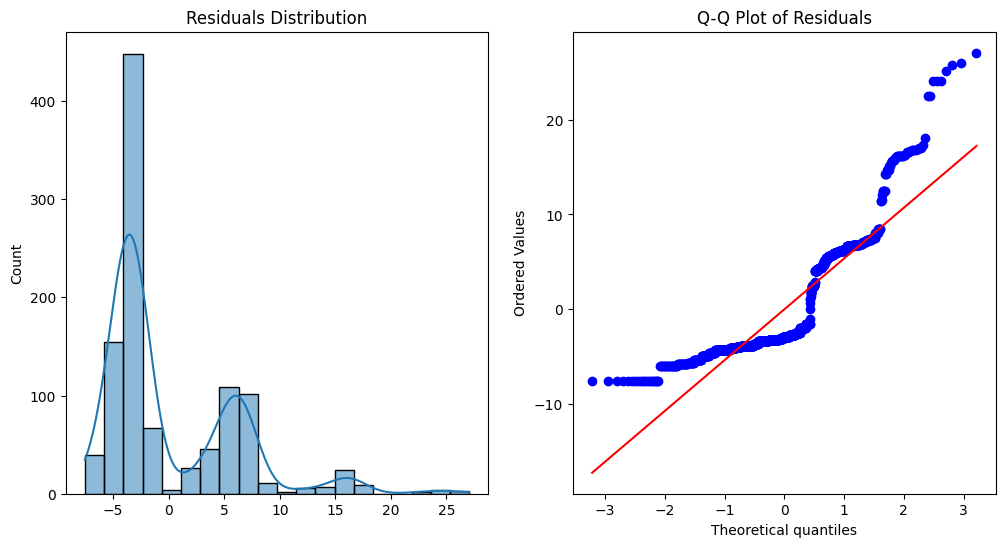

In [77]:
# Checking for normality of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')

# QQ plot for residuals
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

Residuals does not follow a normal distribution, which means that the homogeneity of residuals assumption is not met.

Given that p < 0.05, the equal variances across groups assumption is not met.

In [78]:
# Post-hoc test for the one-way ANOVA
post_hoc = pairwise_tukeyhsd(df['IGSPACE'], df['ward'])

post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-3.3958,0.7171,-8.4358,1.6442,False
1,3,-2.3617,0.9867,-7.1821,2.4587,False
1,4,-2.6339,0.9598,-7.5278,2.26,False
1,5,-0.7014,1.0,-6.0669,4.6641,False
1,6,-0.9869,1.0,-6.1428,4.169,False
1,7,0.4451,1.0,-5.034,5.9241,False
1,8,-2.105,0.9981,-7.0489,2.839,False
1,9,-1.3381,1.0,-6.6056,3.9293,False
1,10,2.231,0.997,-2.8527,7.3146,False
1,11,-2.1625,0.9988,-7.4002,3.0752,False


In [79]:
# One Way ANOVA Research Question 2:
# Do the type of auspices (Non-Profit vs. Commercial vs. City Operated) have a significant effect on the total space (TOTSPACE)?
# First, we identify total number of auspices by category
auspice_totals = df.groupby('AUSPICE')['IGSPACE'].sum()
auspice_totals

AUSPICE
Commercial Agency                1584
Non Profit Agency                2206
Public (City Operated) Agency     352
Name: IGSPACE, dtype: int64

In [80]:
# Then, we perform a one-way ANOVA
model_auspice = ols('IGSPACE ~ C(AUSPICE)', data=df).fit()
anova = sm.stats.anova_lm(model_auspice, typ=2)
anova.round(2)

,sum_sq,df,F,PR(>F)
C(AUSPICE),1776.40,2.0,25.02,0.0
Residual,37634.22,1060.0,NaN,NaN


The p value is <0.001 which is much smaller than the alpha value of 0.05, hence the auspice type has a significant effect on the total infant space

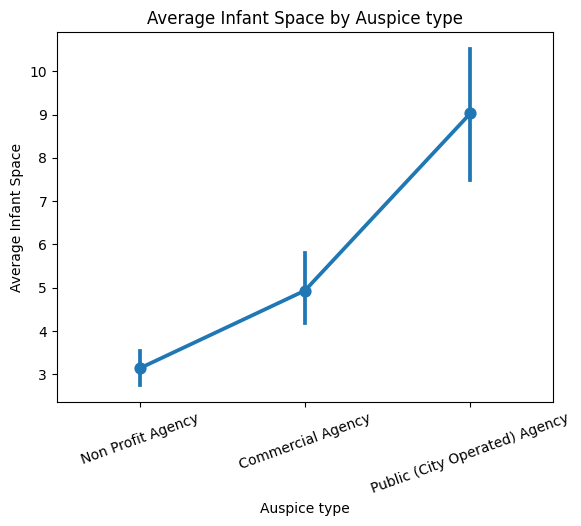

In [81]:
# Plotting results and check assumptions
# Not an interaction plot. Since there is only one independent variable, there is no interaction between variables

sns.pointplot(data=df, x='AUSPICE', y='IGSPACE')
plt.title('Average Infant Space by Auspice type')
plt.ylabel('Average Infant Space')
plt.xlabel('Auspice type')
plt.xticks(rotation=20)
plt.show()

The p value here is <0.001, which means that the normality of residuals assumption is violated.

In [82]:
groups = [group['IGSPACE'] for name, group in df.groupby('AUSPICE')]
homogeneity = stats.levene(*groups)
homogeneity

LeveneResult(statistic=11.095101402945284, pvalue=1.7029492497249345e-05)

In [83]:
# Check for normality of residuals by Shapiro's test
residuals = model_auspice.resid
normality = stats.shapiro(residuals)
normality

ShapiroResult(statistic=0.7506794929504395, pvalue=3.170723864629375e-37)

The p value here is <0.001, which means that the homogeneity of variances assumption is violated.

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

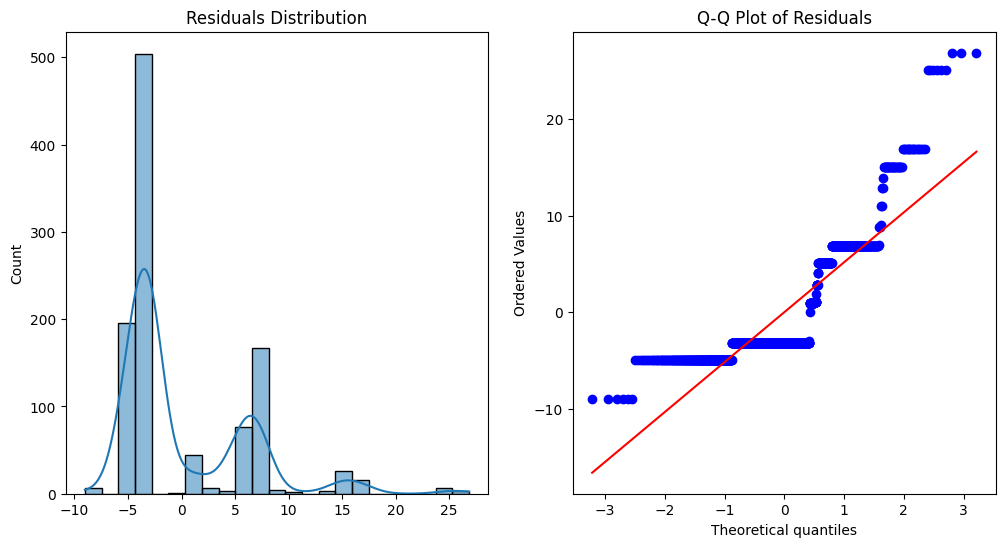

In [84]:
# Checking for normality of residuals visually
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')

# QQ plot for residuals
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

In [85]:
# Post hoc test using tukeyhsd
post_hoc = pairwise_tukeyhsd(endog=df['IGSPACE'], groups=df['AUSPICE'], alpha=0.05)

post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Commercial Agency,Non Profit Agency,-1.7966,0.0,-2.7386,-0.8546,True
Commercial Agency,Public (City Operated) Agency,4.0911,0.0002,1.7196,6.4625,True
Non Profit Agency,Public (City Operated) Agency,5.8877,0.0,3.587,8.1883,True


**Two way ANOVA**

In [86]:
# Is there an interaction effect between the auspice type and the ward on the infant space available?
# Two-way ANOVA to show the effect

model = ols('IGSPACE ~ C(AUSPICE) * C(ward)', data=df).fit()
anova = sm.stats.anova_lm(model, typ=2)

anova

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 18
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 48, but rank is 42
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(AUSPICE),1762.011684,2.0,25.199418,2.110777e-11
C(ward),1633.412599,24.0,1.946688,1.027044e-02
C(AUSPICE):C(ward),1357.412846,48.0,0.808877,8.029484e-01
Residual,34751.588026,994.0,NaN,NaN


The effect of AUSPICE on the infant space is significant (p < 0.001). This means that the type of management (auspice) of the centre significantly affects the infant space available.

The main effect of ward on infant space is also significant (p < 0.001), meaning that the ward where the centre is located significantly influences the infant space available.

The interaction effect between AUSPICE and ward on IGSPACE is, however, not significant.
as p = 0.08 > 0.05. There is no significant interaction between the auspice of the centre and the ward of the centre on the infant spaces available.

([0, 1, 2],
 [Text(0, 0, 'Non Profit Agency'),
  Text(1, 0, 'Commercial Agency'),
  Text(2, 0, 'Public (City Operated) Agency')])

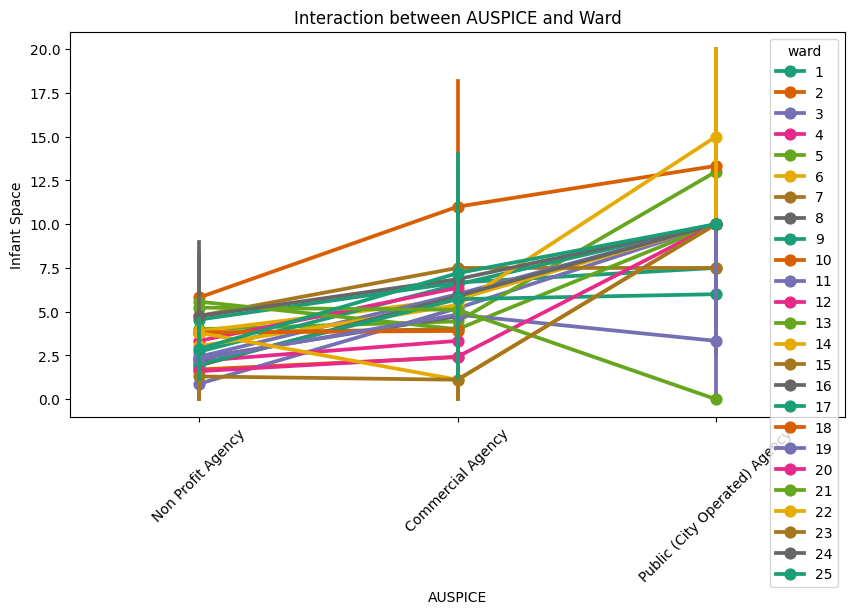

In [87]:
# Interaction plot for AUSPICE and ward
plt.figure(figsize=(10, 5))
sns.pointplot(data=df, x='AUSPICE', y='IGSPACE', hue='ward', palette='Dark2')
plt.title('Interaction between AUSPICE and Ward')
plt.ylabel('Infant Space')
plt.xlabel('AUSPICE')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

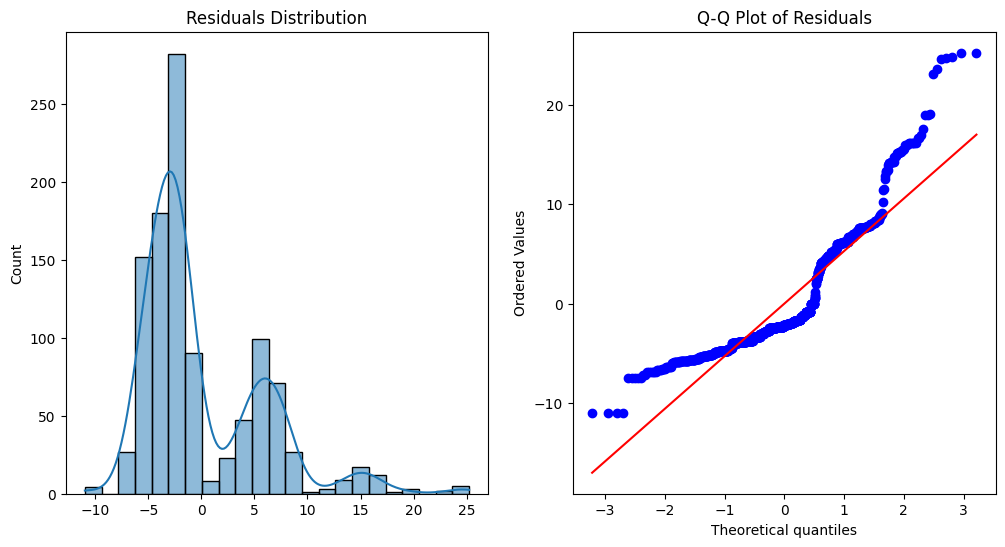

In [88]:
# Checking for normality of residuals
residuals = model.resid
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')

# QQ plot for residuals
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

In [89]:
# Shapiro test for residuals
shapiro = stats.shapiro(residuals)

shapiro

ShapiroResult(statistic=0.8517078757286072, pvalue=1.9809135515876263e-30)

The p value in the shapiro test is far smaller than 0.05, which means that the normality of residuals assumption is violated.

In [90]:
# Post-hoc tests

tukey = pairwise_tukeyhsd(endog=df['IGSPACE'], groups=df['AUSPICE'] + df['ward'].astype(str), alpha=0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Commercial Agency1,Commercial Agency10,4.3333,1.0,-8.1319,16.7986,False
Commercial Agency1,Commercial Agency11,-0.6667,1.0,-14.847,13.5137,False
Commercial Agency1,Commercial Agency12,-0.303,1.0,-12.7683,12.1622,False
Commercial Agency1,Commercial Agency13,-2.6667,1.0,-17.5392,12.2058,False
Commercial Agency1,Commercial Agency14,-1.2857,1.0,-12.6553,10.0839,False
Commercial Agency1,Commercial Agency15,-2.6667,1.0,-14.1685,8.8351,False
Commercial Agency1,Commercial Agency16,-0.7778,1.0,-12.356,10.8004,False
Commercial Agency1,Commercial Agency17,-0.9524,1.0,-12.937,11.0322,False
Commercial Agency1,Commercial Agency18,-2.7667,1.0,-15.45,9.9166,False
Commercial Agency1,Commercial Agency19,-1.8333,1.0,-13.0439,9.3772,False
